# Lab | Customer Analysis Round 7

In [1]:
# import libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from sklearn.impute import SimpleImputer

In [2]:
# load csv file
df1 = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [3]:
# number of rows and columns
df1.shape

(9134, 24)

### 2. Standardize header names.

In [4]:
df1.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
def standard_cols(dataframe):
    '''Standardize column names into lowercase and replace spaces with underscore.'''
    dataframe.columns = [col.lower().replace(' ','_') for col in df1.columns]
standard_cols(df1)
df1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

### Data Cleaning and EDA

In [7]:
#Rounding off to 2 decimal places
df2 = df1
df2 = round(df2,2)

### Datetime format

In [8]:
def transform_to_date(column):
    column = pd.to_datetime(column, errors='coerce')
    return column
df2.effective_to_date = transform_to_date(df2.effective_to_date)

In [9]:
df2.sample(10)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
3003,ZZ31825,Oregon,2519.92,No,Basic,Bachelor,2011-01-25,Unemployed,M,0,...,26,0,1,Personal Auto,Personal L2,Offer2,Branch,482.40,Four-Door Car,Medsize
4813,TL39050,Arizona,23893.30,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,63,0,2,Corporate Auto,Corporate L3,Offer1,Web,381.31,Luxury SUV,Medsize
6922,LR82946,Oregon,6617.14,No,Basic,Bachelor,2011-01-14,Unemployed,M,0,...,61,0,1,Personal Auto,Personal L3,Offer3,Branch,1404.00,Luxury SUV,Medsize
8616,PS68884,California,4686.47,Yes,Basic,College,2011-02-12,Employed,M,58089,...,83,0,1,Corporate Auto,Corporate L3,Offer1,Agent,566.40,SUV,Medsize
8894,UN77671,California,7330.19,No,Extended,College,2011-01-23,Employed,F,26906,...,12,0,3,Personal Auto,Personal L3,Offer3,Branch,106.53,Two-Door Car,Medsize
1894,JC38573,Oregon,5528.21,Yes,Basic,Bachelor,2011-01-19,Employed,M,36088,...,31,0,9,Corporate Auto,Corporate L3,Offer1,Agent,345.60,Four-Door Car,Medsize
3531,NT15165,California,12047.78,No,Premium,Bachelor,2011-01-03,Employed,F,43324,...,17,0,2,Corporate Auto,Corporate L1,Offer2,Branch,284.67,Two-Door Car,Medsize
7508,GW89349,Nevada,7662.43,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,19,0,2,Corporate Auto,Corporate L2,Offer1,Call Center,525.60,Four-Door Car,Medsize
4389,SL70555,California,8184.59,No,Basic,Bachelor,2011-02-05,Employed,M,69114,...,68,0,4,Personal Auto,Personal L3,Offer2,Agent,162.20,SUV,Medsize
244,PP40919,California,2376.53,No,Extended,College,2011-01-31,Unemployed,F,0,...,8,5,1,Personal Auto,Personal L1,Offer1,Agent,436.80,Two-Door Car,Medsize


In [10]:
df3 = df2.copy()
df3

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,7645.86,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,2813.69,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.99,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.23,Four-Door Car,Medsize
9130,PK87824,California,3096.51,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.20,Four-Door Car,Medsize
9131,TD14365,California,8163.89,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.78,Four-Door Car,Medsize
9132,UP19263,California,7524.44,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.20,Four-Door Car,Large


### Describe DataFrame.

In [11]:
df3.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940473,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088834
std,6870.967599,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500043
min,1898.010000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.100000
25%,3994.250000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.260000
50%,5780.180000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945000
75%,8962.170000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.515000
max,83325.380000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.240000


### Show a plot of the total number of responses.

<AxesSubplot:xlabel='response', ylabel='Count'>

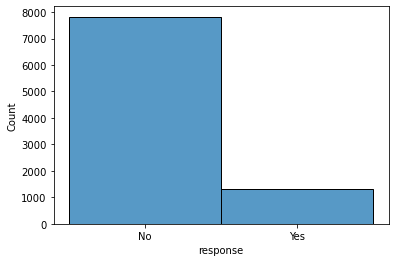

In [12]:
response = df3['response']
sns.histplot(response)

In [13]:
response.value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

### Show a plot of the response rate by the sales channel.

Text(0.5, 1.0, 'Percent of Response per Sales Channel')

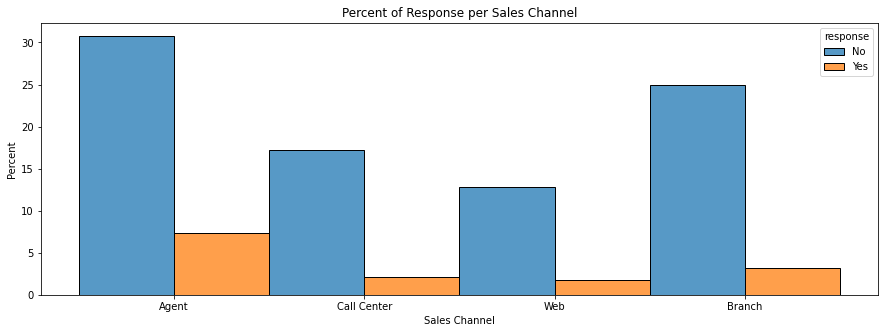

In [14]:
plt.figure(figsize=(15,5))
sns.histplot(data=df3, x='sales_channel', hue=response, stat='percent', multiple='dodge')
plt.xlabel('Sales Channel')
plt.title('Percent of Response per Sales Channel')

### 5. Show a plot of the response rate by the total claim amount.

In [15]:
# new dfs separating responses to yes and no
no= df3[df3['response']=='No']
yes= df3[df3['response']=='Yes']

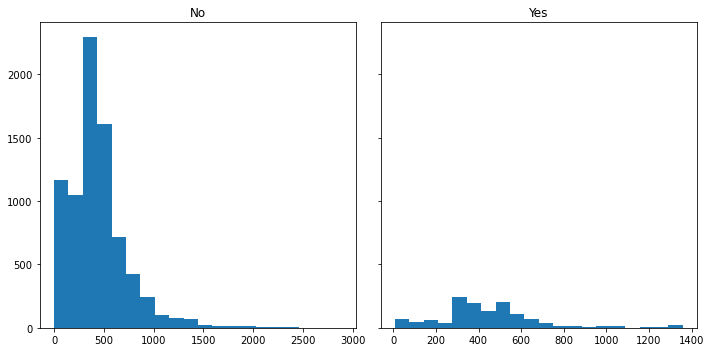

In [16]:
fig, axs = plt.subplots(1,2, sharey=True, tight_layout=True, figsize=(10,5))
axs[0].hist(no['total_claim_amount'], bins=20)
axs[0].title.set_text('No')

axs[1].hist(yes['total_claim_amount'], bins=20)
axs[1].title.set_text('Yes')

plt.show()

<AxesSubplot:xlabel='response', ylabel='total_claim_amount'>

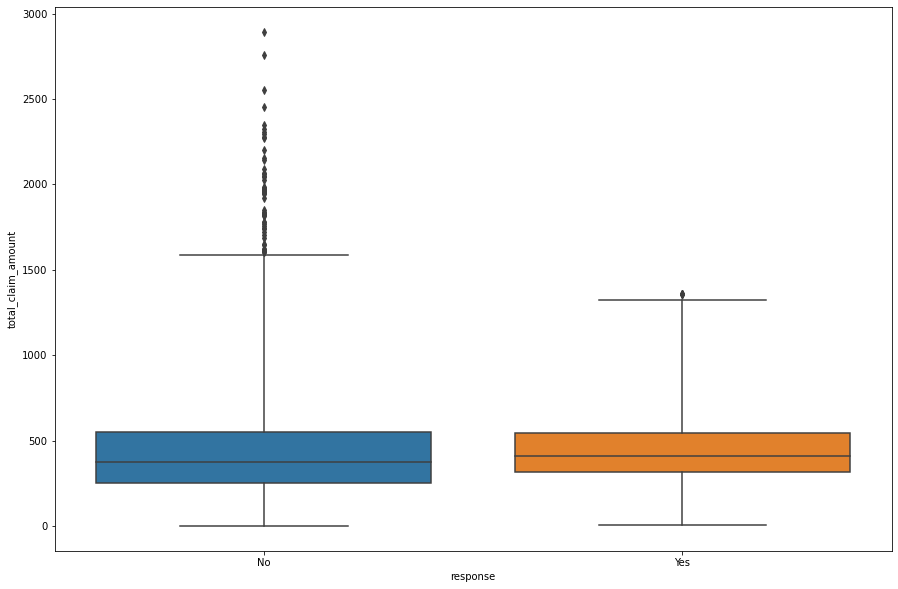

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df3, x= 'response', y='total_claim_amount',whis=3.5)

### Show a plot of the response rate by income.

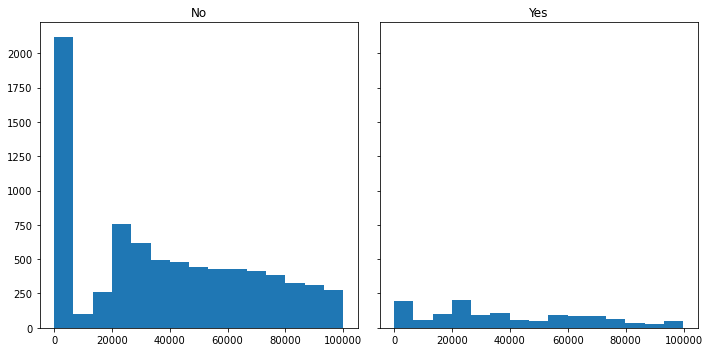

In [18]:
fig, axs = plt.subplots(1,2, tight_layout=True, sharey=True, figsize=(10,5))
axs[0].hist(no['income'], bins=15)
axs[0].title.set_text('No')
axs[1].hist(yes['income'], bins=15)
axs[1].title.set_text('Yes')

plt.show()

<AxesSubplot:xlabel='response', ylabel='income'>

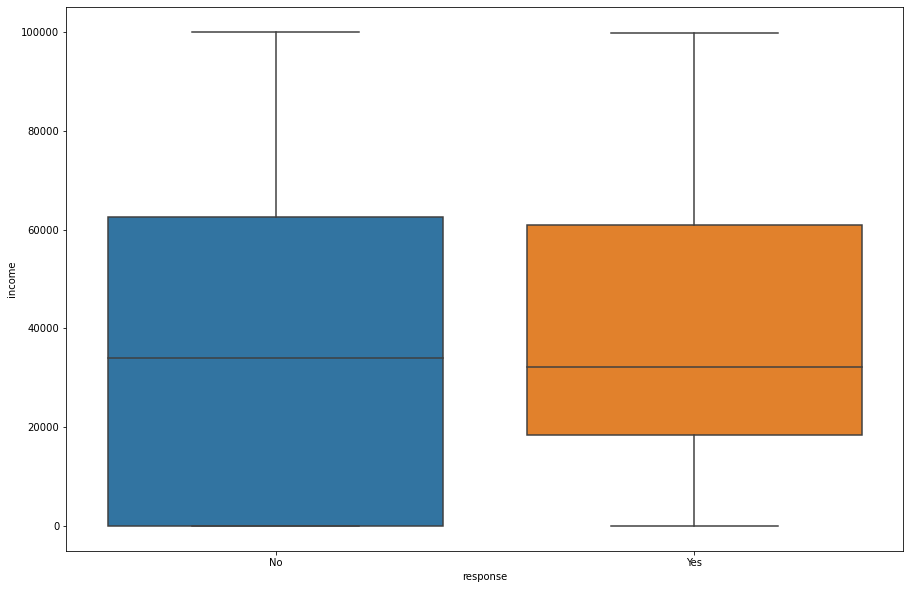

In [19]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df3, x= 'response', y='income')

# Round 4 | Exercises :

### Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categorical.

In [20]:
df3.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [21]:
# Separate numerical and categorical variables
numerical = df3.select_dtypes([np.number])
categorical = df3.select_dtypes([object])

In [22]:
numerical.info()
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer          9134 non-null   obje

### Visualisation
- Seaborn library to construct distribution plots for the numerical variables

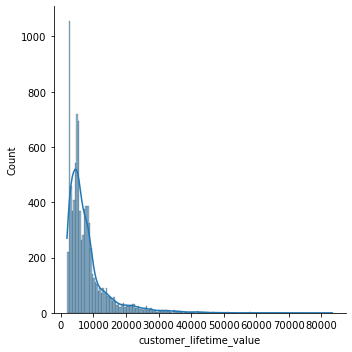

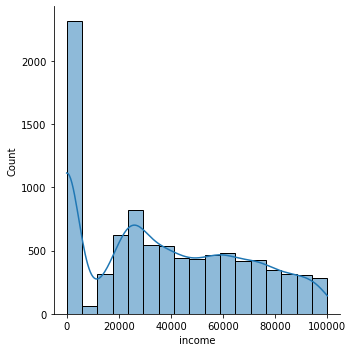

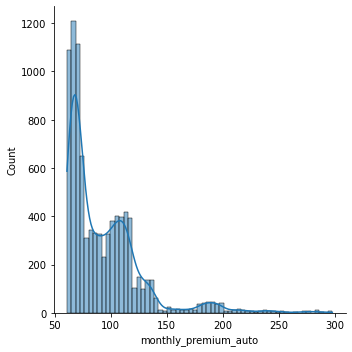

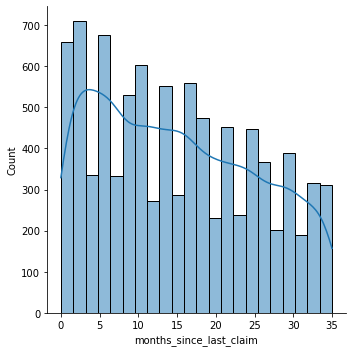

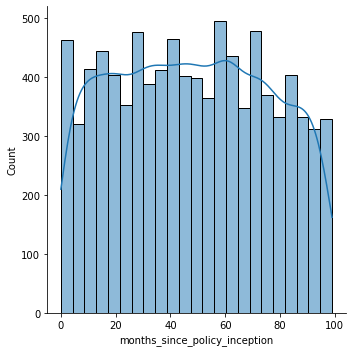

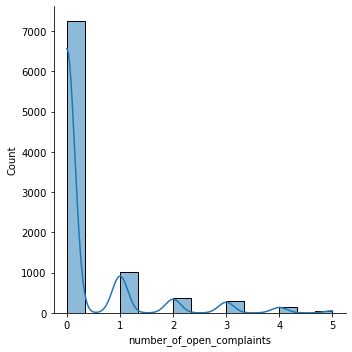

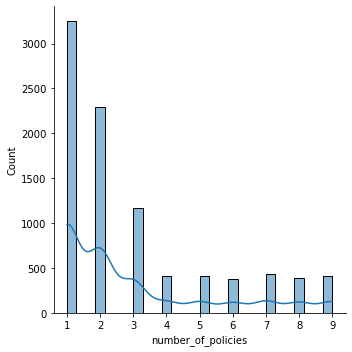

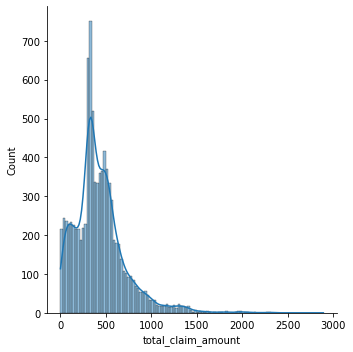

In [23]:
for column in numerical.columns:
    sns.displot(numerical[column], kde=True)
    plt.show()

- Matplotlib to construct histograms

In [24]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

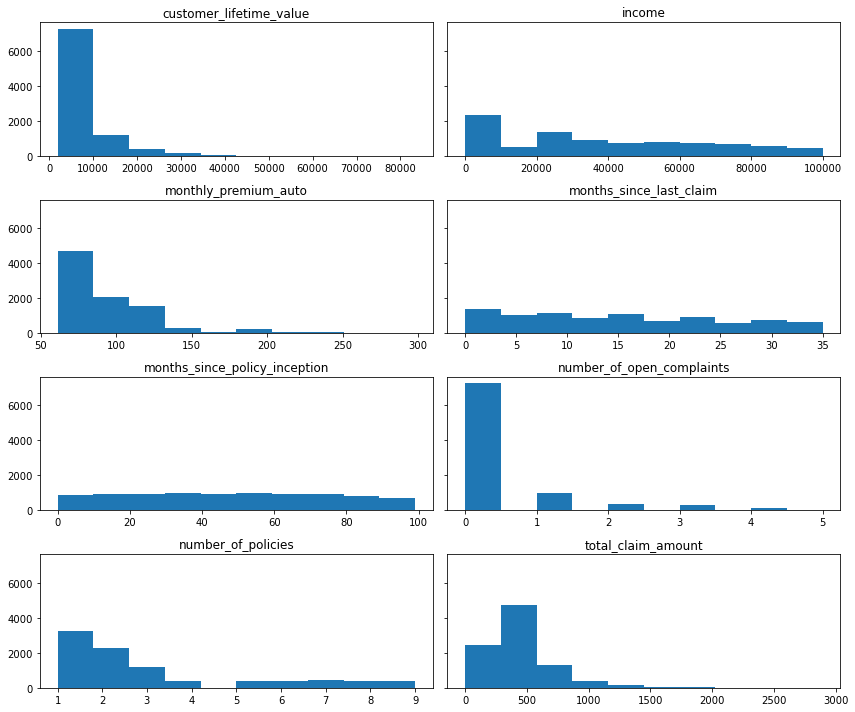

In [25]:
fig, axs = plt.subplots(4,2, sharey=True, tight_layout=True, figsize=(12,10))

axs[0,0].hist(numerical['customer_lifetime_value'])
axs[0,0].title.set_text('customer_lifetime_value')

axs[0,1].hist(numerical['income'])
axs[0,1].title.set_text('income')

axs[1,0].hist(numerical['monthly_premium_auto'])
axs[1,0].title.set_text('monthly_premium_auto')

axs[1,1].hist(numerical['months_since_last_claim'])
axs[1,1].title.set_text('months_since_last_claim')

axs[2,0].hist(numerical['months_since_policy_inception'])
axs[2,0].title.set_text('months_since_policy_inception')

axs[2,1].hist(numerical['number_of_open_complaints'])
axs[2,1].title.set_text('number_of_open_complaints')

axs[3,0].hist(numerical['number_of_policies'])
axs[3,0].title.set_text('number_of_policies')

axs[3,1].hist(numerical['total_claim_amount'])
axs[3,1].title.set_text('total_claim_amount')



- Do the distributions for different numerical variables look like a normal distribution: Maybe the total_claim_amount

### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features.

<AxesSubplot:>

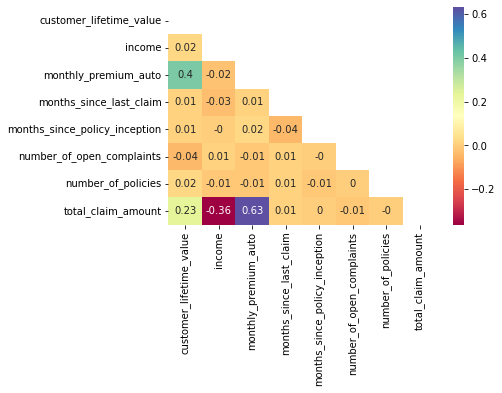

In [26]:
corr_num=round(numerical.corr(),2)
mask = np.zeros_like(corr_num)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_num, annot=True, cmap='Spectral', mask=mask)

# Lab 5

## X, y Split

In [27]:
y = numerical.total_claim_amount
X = numerical.drop(['total_claim_amount'], axis=1)

In [28]:
X.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.52,56274,69,32,5,0,1
1,6979.54,0,94,13,42,0,8
2,12887.43,48767,108,18,38,0,2
3,7645.86,0,106,18,65,0,7
4,2813.69,43836,73,12,44,0,1


In [29]:
transformer = MinMaxScaler().fit(X) ### USE MINMAX FOR NORMALIZING
X_minmax = transformer.transform(X) #This is a an array of arrays
print(X_minmax.shape)

(9134, 7)


In [30]:
X_norm = pd.DataFrame(X_minmax,columns=X.columns)
X_norm.head() 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000


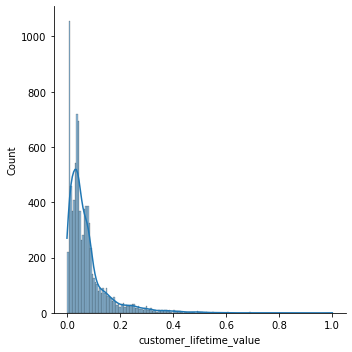

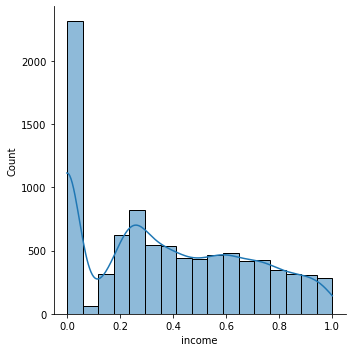

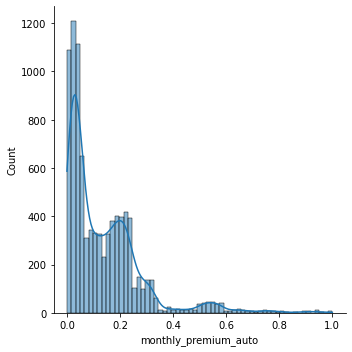

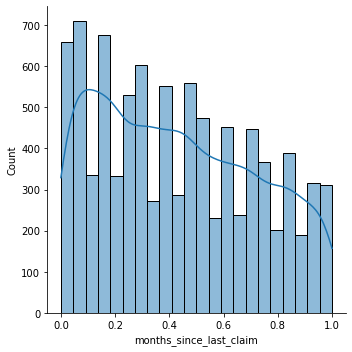

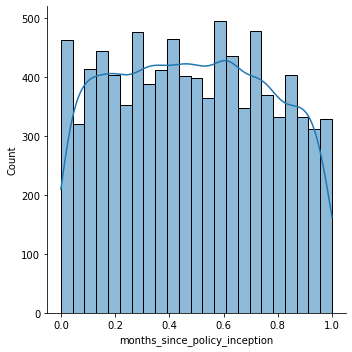

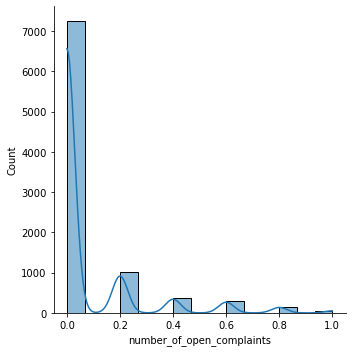

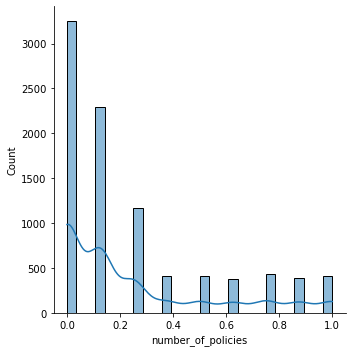

In [31]:
for col in X_norm.columns:
    sns.displot(X_norm[col],kde=True)
    plt.show()

In [32]:
categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [33]:
categorical.response.value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [34]:
# Drop columns which are not helpful in predicting total_claim_amount
X_cat=categorical.drop(['customer','response', 'marital_status', 'education'], axis=1)
X_cat

,state,coverage,employmentstatus,gender,location_code,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,Basic,Employed,F,Suburban,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,Extended,Unemployed,F,Suburban,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,Premium,Employed,F,Suburban,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,Basic,Unemployed,M,Suburban,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,Basic,Employed,M,Rural,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...
9129,California,Basic,Employed,M,Urban,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Extended,Employed,F,Suburban,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,Extended,Unemployed,M,Suburban,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,Extended,Employed,M,Suburban,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [35]:
# One Hot Transformation for categoricals
X_cat_dumm = pd.get_dummies(X_cat)
X_cat_dumm

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,coverage_Basic,coverage_Extended,coverage_Premium,employmentstatus_Disabled,employmentstatus_Employed,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,1,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
9130,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
9131,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
9132,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [36]:
# Concatenate numericals and transformed categoricals
X_norm_dumm = pd.concat([X_norm, X_cat_dumm], axis=1)
X_norm_dumm

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_Arizona,state_California,state_Nevada,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0,1,0,...,1,1,0,0,0,0,0,0,1,0
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [37]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_norm_dumm, y, test_size=0.3, random_state=11)


In [38]:
# Apply Linear Regression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [39]:
predictions  = model.predict(X_test)
predictions

array([487.5, 216.5, 514. , ..., 380. , 327.5,  55.5])

## Model Validation

In [40]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

r2 =  0.7630494580414728
RMSE =  143.84596977028448
MSE =  20691.663019153595
MAE =  98.82952572053995


In [41]:
y.describe()

count    9134.000000
mean      434.088834
std       290.500043
min         0.100000
25%       272.260000
50%       383.945000
75%       547.515000
max      2893.240000
Name: total_claim_amount, dtype: float64

### Use the concept of multicollinearity and remove insignificant variables
- no multicollinearity as previously shown in the heatmap above

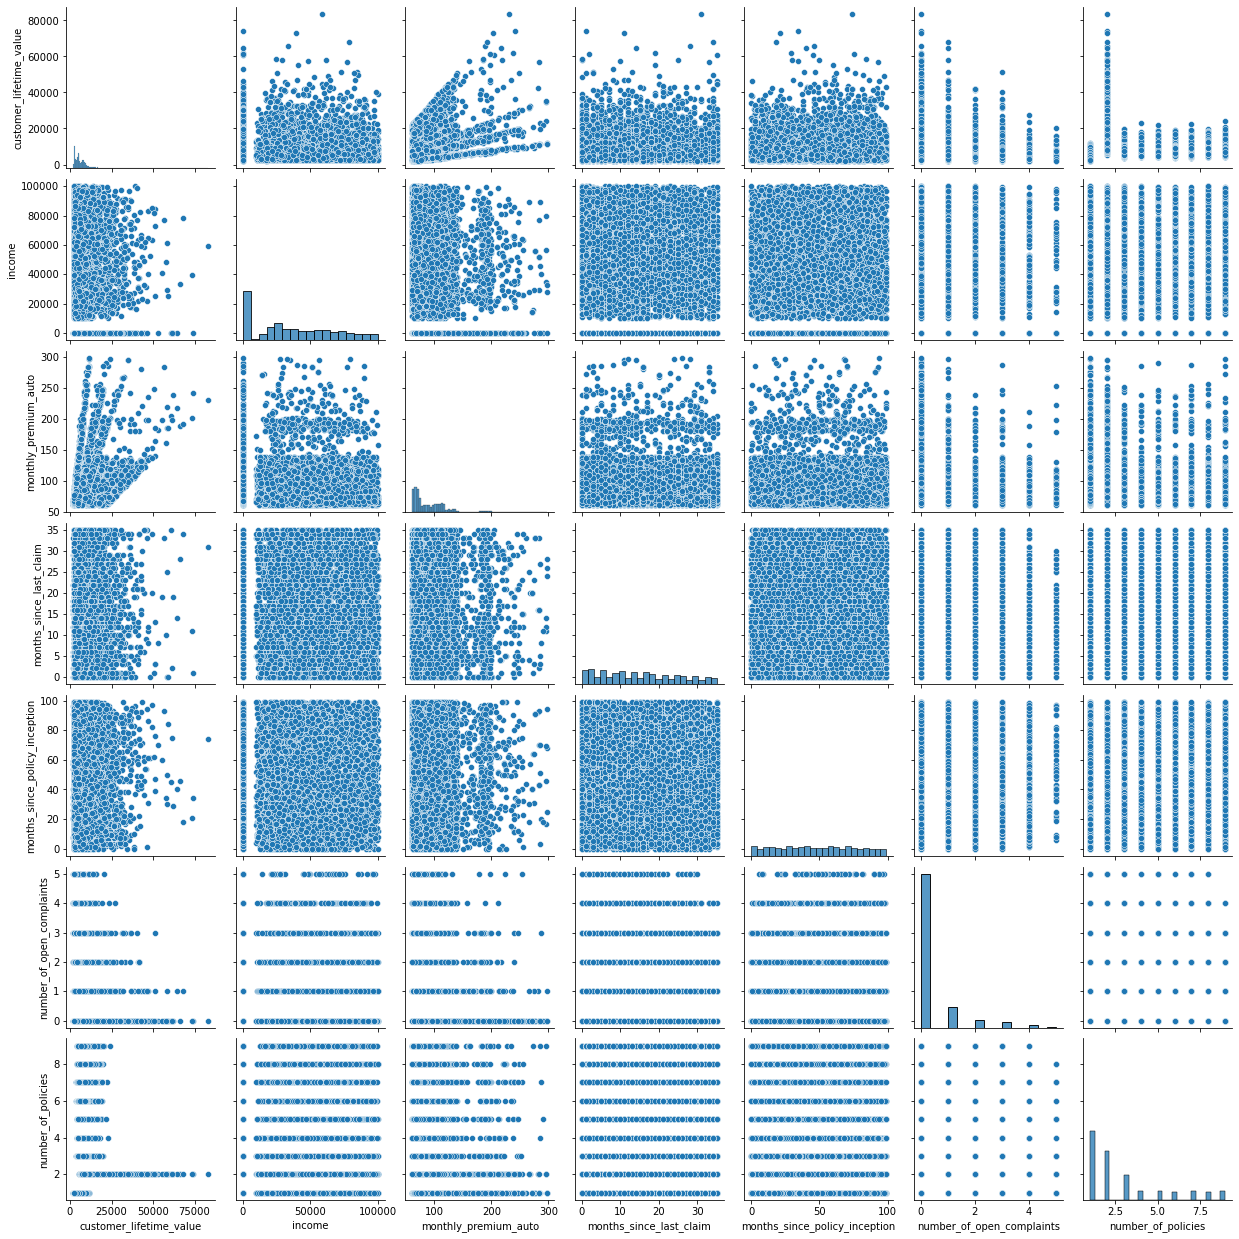

In [42]:
sns.pairplot(X)

### Use a different method of scaling the numerical variables


In [43]:
# Try Standardization
transformer = StandardScaler().fit(X)
X_standardized = transformer.transform(X)

In [44]:
X_stand = pd.DataFrame(X_standardized, columns=X.columns)
X_stand.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648


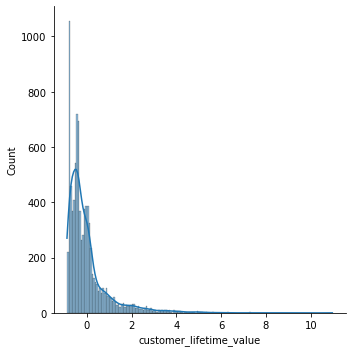

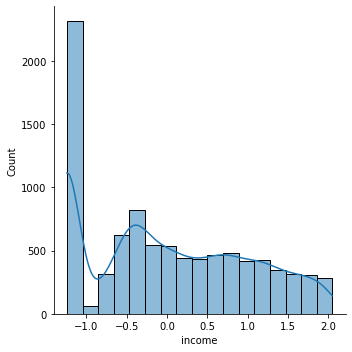

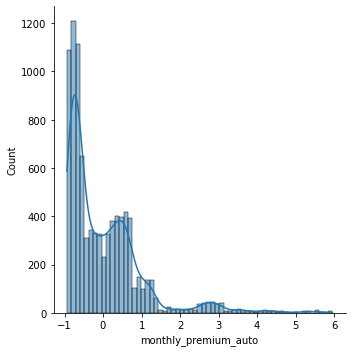

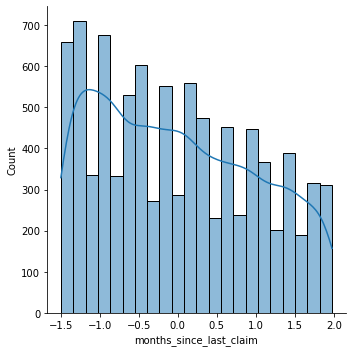

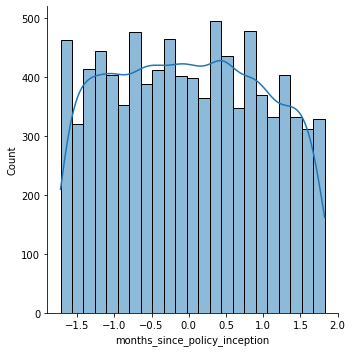

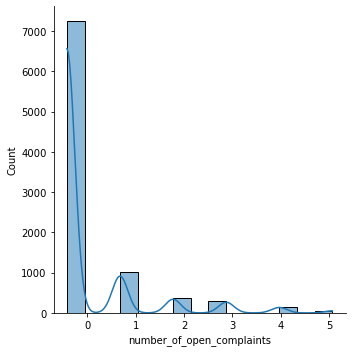

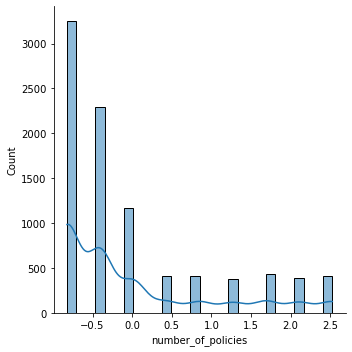

In [45]:
for col in X_stand.columns:
    sns.displot(X_stand[col], kde=True)
    plt.show()

### Use a different ratio of train test split

In [46]:
# Concatenate standardized numerical dataframe with categorical dummies
X_stand_dumm = pd.concat([X_stand, X_cat_dumm], axis=1)
X_stand_dumm.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_Arizona,state_California,state_Nevada,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [47]:
# Train-Test Split with 80% training set and 20% test
X1_train, X1_test, y1_train, y1_test = train_test_split(X_stand_dumm, y, test_size=0.2, random_state=11)

In [48]:
# Apply Linear Regression
model_s = LinearRegression()
model_s.fit(X1_train,y1_train)

LinearRegression()

In [49]:
pred  = model_s.predict(X1_test)
pred

array([507., 221., 478., ..., 386., 405.,  57.])

## Model Validation

In [50]:
r2 = r2_score(y1_test, pred)
RMSE = mean_squared_error(y1_test, pred, squared=False)
MSE = mean_squared_error(y1_test, pred)
MAE = mean_absolute_error(y1_test, pred)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

r2 =  0.7422909957480942
RMSE =  152.85151005272022
MSE =  23363.584125396825
MAE =  104.29873563218389


### Insights: 
- Reducing the train-test split to 80/20 seemed to make the model worse than the 70/30 split at the beginning, but not by a lot.
- In terms of scaling, normalization had slightly better results compared to standardization.

### Use the transformation on numerical columns which align it more towards a normal distribution


In [130]:
# Try log transformation
X_copy = X.copy()
X_copy.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.52,56274,69,32,5,0,1
1,6979.54,0,94,13,42,0,8
2,12887.43,48767,108,18,38,0,2
3,7645.86,0,106,18,65,0,7
4,2813.69,43836,73,12,44,0,1


/Users/RachelleFlores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

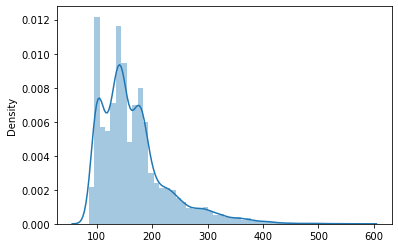

In [129]:
#Squareroot Transformation
X_clv_sqrt = stats.boxcox(X_copy.customer_lifetime_value, lmbda=0.5)
sns.distplot(X_clv_sqrt)

In [142]:
# Dealing with negatives
X_copy.income = np.where(X_copy['income']<=0, np.NAN, X_copy['income'])
X_copy.income = X_copy.income.fillna(X_copy.income.median())

/Users/RachelleFlores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

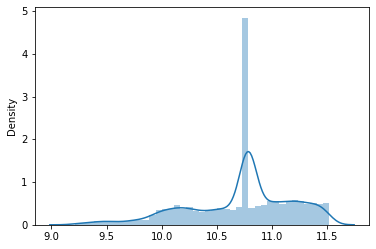

In [149]:
X_income_log = stats.boxcox(X_copy.income, lmbda=0)
sns.distplot(X_income_log)

/Users/RachelleFlores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

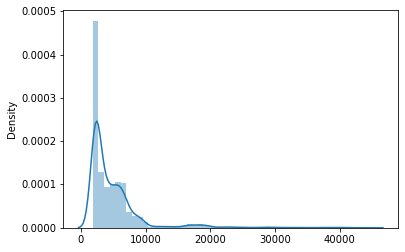

In [156]:
X_mpa_sqr = stats.boxcox(X_copy.monthly_premium_auto, lmbda=2)
sns.distplot(X_mpa_sqr)

In [104]:
# Dealing with negatives
X_copy.months_since_last_claim = np.where(X_copy['months_since_last_claim']<=0, np.NAN, X_copy['months_since_last_claim'])
X_copy.months_since_last_claim = X_copy.months_since_last_claim.fillna(X_copy.months_since_last_claim.mean())
                                          

In [105]:
X_copy.months_since_last_claim.describe()

count    9134.000000
mean       15.634467
std         9.662064
min         1.000000
25%         7.000000
50%        15.000000
75%        23.000000
max        35.000000
Name: months_since_last_claim, dtype: float64

/Users/RachelleFlores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

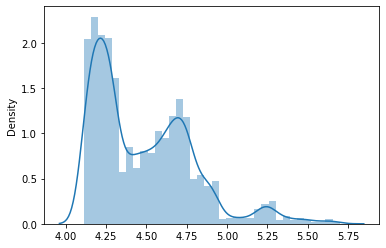

In [84]:
X_mlc_log = stats.boxcox(X_copy.months_since_last_claim, lmbda=0)
sns.distplot(X_mpa_log)

/Users/RachelleFlores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

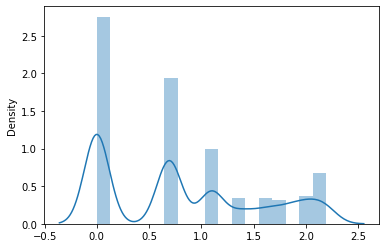

In [125]:
X_pol_log = stats.boxcox(X_copy.number_of_policies, lmbda=0)
sns.distplot(X_pol_log)

In [131]:
X_norm_dumm.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_Arizona,state_California,state_Nevada,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0,0,0,...,0,1,0,0,0,0,0,0,1,0


### Improve the model

In [182]:
# Copy normalized df before replacing some columns with other transformation
X_trans = X_norm.copy()

In [183]:
X_trans['customer_lifetime_value'] = X_clv_sqrt
X_trans['income'] = X_income_log
X_trans['monthly_premium_auto'] = X_mpa_sqr

In [184]:
X_trans.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,103.138385,10.937988,2380.0,0.914286,0.050505,0.0,0.000
1,165.087283,10.780642,4417.5,0.371429,0.424242,0.0,0.875
2,225.045634,10.794809,5831.5,0.514286,0.383838,0.0,0.125
3,172.881217,10.780642,5617.5,0.514286,0.656566,0.0,0.750
4,104.088454,10.688211,2664.0,0.342857,0.444444,0.0,0.000


In [185]:
X_trans.rename(columns={'customer_lifetime_value': 'clv_sqrt',
                      'income': 'income_log',
                      'monthly_premium_auto' : 'mpa_sqr'
                     })

,clv_sqrt,income_log,mpa_sqr,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,103.138385,10.937988,2380.0,0.914286,0.050505,0.0,0.000
1,165.087283,10.780642,4417.5,0.371429,0.424242,0.0,0.875
2,225.045634,10.794809,5831.5,0.514286,0.383838,0.0,0.125
3,172.881217,10.780642,5617.5,0.514286,0.656566,0.0,0.750
4,104.088454,10.688211,2664.0,0.342857,0.444444,0.0,0.000
...,...,...,...,...,...,...,...
9129,303.980326,11.183602,2664.0,0.514286,0.898990,0.0,0.125
9130,109.292587,9.980634,3120.0,0.400000,0.282828,0.0,0.000
9131,178.708495,10.780642,3612.0,0.257143,0.373737,0.6,0.125
9132,171.487060,9.996112,4607.5,0.971429,0.030303,0.0,0.250


In [187]:
# New Categorical dataset
X_cat.columns

Index(['state', 'coverage', 'employmentstatus', 'gender', 'location_code',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [188]:

X_cat_new = X_cat.drop(['state', 'employmentstatus', 'policy', 'sales_channel'], axis=1)
new_cat_dumm = pd.get_dummies(X_cat_new)
new_cat_dumm 

,coverage_Basic,coverage_Extended,coverage_Premium,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,policy_type_Corporate Auto,policy_type_Personal Auto,...,renew_offer_type_Offer4,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
9130,0,1,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9131,0,1,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9132,0,1,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [190]:
# Concat to new X
X_new = pd.concat([X_trans, new_cat_dumm], axis=1)
X_new.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage_Basic,coverage_Extended,coverage_Premium,...,renew_offer_type_Offer4,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,103.138385,10.937988,2380.0,0.914286,0.050505,0.0,0.000,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,165.087283,10.780642,4417.5,0.371429,0.424242,0.0,0.875,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,225.045634,10.794809,5831.5,0.514286,0.383838,0.0,0.125,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,172.881217,10.780642,5617.5,0.514286,0.656566,0.0,0.750,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,104.088454,10.688211,2664.0,0.342857,0.444444,0.0,0.000,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [195]:
# Train-Test Split
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y, test_size=0.3, random_state=11)

In [196]:
# Apply Linear Regression
model_new = LinearRegression()
model_new.fit(X_new_train,y_new_train)

LinearRegression()

In [197]:
pred_new= model_new.predict(X_new_test)
pred_new

array([421.47739822, 228.20311722, 413.74422031, ..., 433.97997899,
       310.87011816,  84.69910821])

## Model Validation

In [198]:
r2 = r2_score(y_new_test, pred_new)
RMSE = mean_squared_error(y_new_test, pred_new, squared=False)
MSE = mean_squared_error(y_new_test, pred_new)
MAE = mean_absolute_error(y_new_test, pred_new)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

r2 =  0.7414979594086988
RMSE =  150.24527853160134
MSE =  22573.64372103847
MAE =  104.91561741031988
